# Céladon: Analisando cerâmicas de 4.000 anos

A fluorescência de raios-X por energia dispersiva (EDXRF) foi usada para determinar a composição química do celadon no forno de Longquan (no condado de Dayao) e no forno de Jingdezhen. 

Celadon é um termo para cerâmica e porcelana chinesa,de esmalte feldspático, com cores que variam do verde-oliva, passa pelo verde claro ou escuro, e tem nuances que vão do amarelo ao azul. É interessante pensar que, hoje, ao olhar um desses vasos, eles pareçam simples e nada especiais. Mas, numa época em que havia apenas a cerâmica rústica e fosca, quando as cores no dia a dia eram raras, o surgimento do céladon – em tons de verde translúcido que lembram o jade, com uma superfície lustrosa e esmaltada, em formas simples e puras – era tão fascinante que chegou a inspirar poetas e conquistar diferentes culturas ao longo dos séculos. 

Quarenta fragmentos típicos em quatro eras culturais foram selecionados para investigar as matérias-primas e a tecnologia de queima. Esperamos identificar os elementos químicos que são as variáveis explicativas mais fortes para classificar as amostras em diferentes eras culturais e fornos. 

## Objetivo

A análise de agrupamento é um método de aprendizagem não supervisionado que separa os pontos de dados em vários conjuntos ou grupos específicos, de modo que os pontos de dados nos mesmos grupos tenham propriedades semelhantes e os pontos de dados em grupos diferentes tenham propriedades diferentes em algum sentido. 

Queremos realizar análise de agrupamento para separar em diferentes grupos (clusters) as  amostras de cerâmica com base em sua composição química usando o algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

## Dataset

Link do dataset: <a href="https://archive.ics.uci.edu/ml/datasets/Chemical+Composition+of+Ceramic+Samples" target='_blanck'> UCI - Chemical Composition of Ceramic Samples Data Set </a>

## Importando as Bibliotecas e os Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Chemical Composion of Ceramic.csv")
df 

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DY-M-3-g,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,DY-QC-1-g,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,DY-QC-2-g,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,DY-QC-3-g,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [3]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

## Preprocessamento

In [4]:
# Seleciona as colunas e interesse, no caso, as composições químicas
X_numeric = df.copy()
X_numeric = X_numeric.drop(['Ceramic Name','Part'],axis=1)
X_numeric.head()

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [5]:
# Padroniza od dados
X_numeric = StandardScaler().fit_transform(X_numeric)

PCA (principal component analysis) é talvez um dos algoritmos não supervisionados mais amplamente usados, é fundamentalmente um algoritmo de redução de dimensionalidade. Usar o PCA para redução de dimensionalidade envolve zerar um ou mais dos menores componentes principais, resultando em uma projeção de dimensão inferior dos dados que preserva a variância máxima dos dados. 

In [6]:
# Aplica PCA
X = PCA(n_components=2).fit_transform(X_numeric)

## DBSCAN

É um algoritmo básico para agrupamento baseado em densidade. Ele pode descobrir clusters de diferentes formas e tamanhos a partir de uma grande quantidade de dados, com base na ideia de que um cluster no espaço de dados é uma região contígua de alta densidade de pontos, separada de outros clusters por regiões contíguas de baixa densidade de pontos. 

Para escolher a melhor combinação de parâmetros para os algoritmos, criamos uma matriz de combinações 

In [7]:
# Parâmetros
eps_values = np.arange(0.2,1,0.1) 
min_samples = np.arange(2,6) 
# Combina os parâmetros
DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    # Número de clusters
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    # Avalia a métrica dos clusters
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))


Vamos desenhar o mapa de calor para mostrar quantos clusters foram gerados pelos parâmetros 

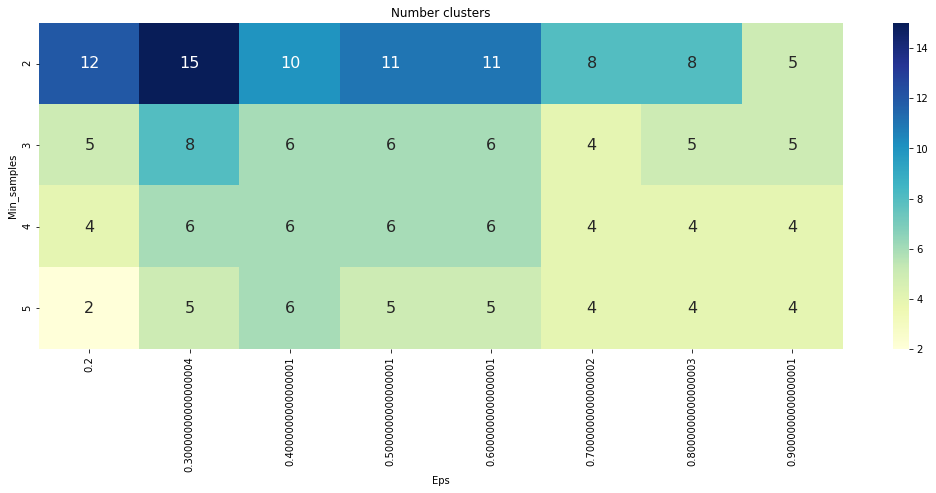

In [8]:
# Adiciona os parâmetro em um dataframe
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples']) 
# Adiciona uma coluna no datframe com o correspondente número de clusters encontrados  
tmp['No_of_clusters'] = no_of_clusters

# Cria uma tabela de pivotamento entre os parâmetros e os possíveis clusters encontrados
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

# Gera um mapa de calor com a tabela pivotada
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number clusters')
plt.show()

O número de cluster encontrados variam de 15 a 2 dependendo dos parâmetros usados.

Vamos agora analisar as métricas de avaliação dos possíveis clusters usando o algoritmo Silhouette_score. O coeficiente silhueta é calculado usando a distância média intra-cluster (a) e a distância média mais próxima do cluster (b) para cada amostra. O coeficiente de silhueta para uma amostra é (b - a)/máx(a, b).  O melhor valor é 1 e o pior valor é -1. Valores próximos a 0 indicam clusters sobrepostos.

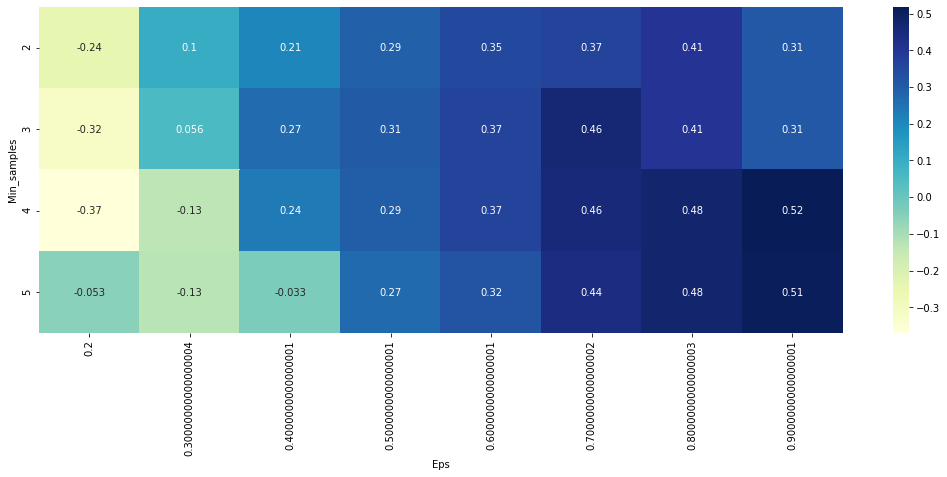

In [9]:
# dataframe com os parâmetros
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
# coluna no dataframe com os coeficientes de silhueta   
tmp['Sil_score'] = sil_score

# cria uma tabela de pivotamento entre os paâmetros e os correspondentes coeficientes encontrados
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

# gera um mapa de calor
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Os parâmetros que maximizam a métrica de avaliação foram eps entre 0.7 a 0.9 e min_samples entre 4 e 5.

Vamos aplicar no nosso modelo os valores eps=0.9, para maximilizar sua eficiência, e min_samples=3. Para este último parâmetro usamos um valor abaixo do encontrado na análise da métrica, pois ele representa o número mínimo de clusters, então é bom deixar o modelo um pouco mais flexível. 

In [16]:
# Usamos o modelo com os melhores parâmetros encontrados
DBS_clustering = DBSCAN(eps=0.9, min_samples=3).fit(X)

# cria um data frame com os dados e os rótulos dos cluster encontrados
DBSCAN_clustered = pd.DataFrame(X.copy())
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [17]:
# agrupa os dados por rótulo do cluster
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2
0,44
1,34
2,4
3,4


O modelo DBSCAN criou 4 clusters (numerados entre 0 a 3) mais um de outliers (cluster -1).

Por fim, vamos visualizar os agrupamentos encotrados para as cerâmicas e céladon.

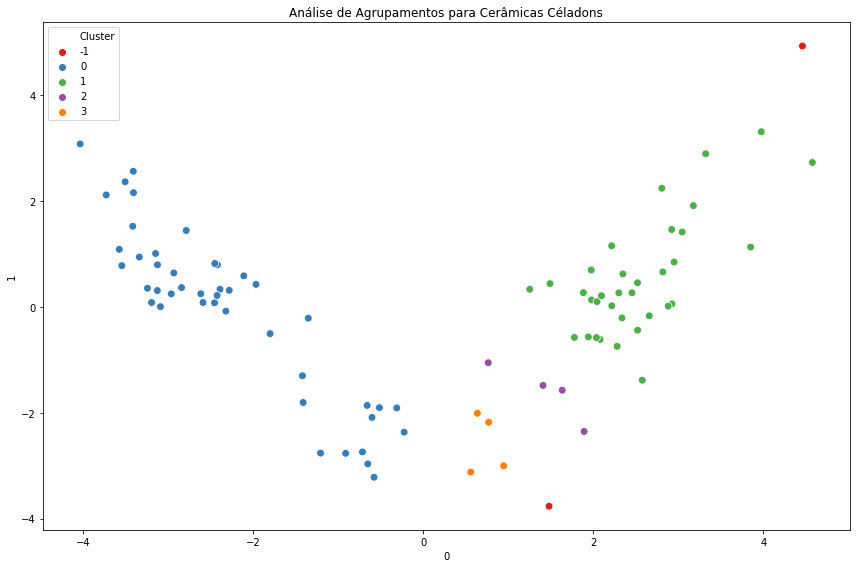

In [24]:
# pega o nome das colunas 
c = DBSCAN_clustered.columns

# desenha o gráfico com os clusters
fig, (ax) = plt.subplots(figsize=(12,8))
sns.scatterplot(c[0],c[1],data=DBSCAN_clustered, hue='Cluster',legend='full',palette='Set1',s=60)
plt.title("Análise de Agrupamentos para Cerâmicas Céladons")
plt.tight_layout()
plt.show()


##  Conclusão

**Usando as composições químicas das cerâmicas céladon, realizamos uma análise de agrupamento. O algoritmo DBSCAN, usado no projeto, conseguiu distinguir 4 grupos e céladons entre os dados.**